In [7]:
# Base import and functions

import imutils
import cv2
from imutils import contours

import sys
import os, os.path

from tqdm import tqdm

import pytesseract             # Python interface to tesseract for OCR

import numpy as np
from PIL import Image

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


### Prepare image

In [68]:
%%time

image = cv2.imread("test_data/IMG_0307.JPG")

CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 137 ms


#### 1. Gradient

CPU times: user 213 ms, sys: 1.66 ms, total: 215 ms
Wall time: 189 ms


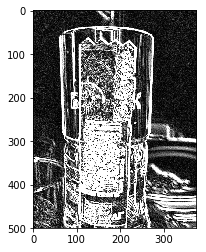

In [69]:
%%time

resized = imutils.resize(image, height=500)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
 
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_GRAY2RGB))

#### 2. Blur and threshold the image

CPU times: user 46.2 ms, sys: 584 µs, total: 46.7 ms
Wall time: 48.5 ms


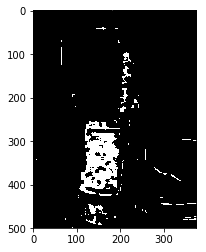

In [70]:
%%time

blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))

#### 3. Construct a closing kernel and apply it to the thresholded image

CPU times: user 209 ms, sys: 905 µs, total: 210 ms
Wall time: 210 ms


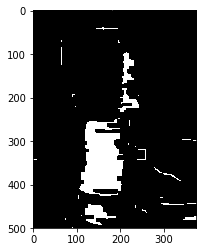

In [86]:
%%time

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(cv2.cvtColor(closed, cv2.COLOR_GRAY2RGB))

#### 4. Perform a series of erosions and dilations

CPU times: user 47.7 ms, sys: 0 ns, total: 47.7 ms
Wall time: 50.3 ms


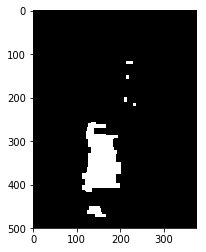

In [87]:
%%time

closed = cv2.erode(closed, None, iterations = 6)
closed = cv2.dilate(closed, None, iterations = 3)

plt.imshow(cv2.cvtColor(closed, cv2.COLOR_GRAY2RGB))

#### 5. Find the contours in the thresholded image, then sort the contours by their area, keeping only the largest one

CPU times: user 45.3 ms, sys: 2.61 ms, total: 47.9 ms
Wall time: 47.9 ms


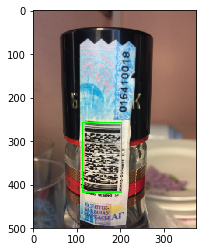

In [92]:
%%time

cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
(x, y, w, h) = cv2.boundingRect(c)
 
# draw a bounding box arounded the detected barcode and display the image
cv2.rectangle(resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))